In [ ]:
#connect gpu

import os

if 'COLAB_GPU' in os.environ:
  print("GPU is enabled!")
else:
  print('GPU is not enabled!')

GPU is enabled!


In [2]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 842.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [4]:
%pwd

'/content'

In [ ]:
#create file for download dataset
!mkdir mineral_detector_dataset

In [6]:
!ls

mineral_detector_dataset


In [ ]:
#dataset path
path="/content/mineral_detector_dataset"

In [8]:
os.chdir("/content/mineral_detector_dataset")

In [ ]:
#download dataste 
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Wx6MlevfSC0wKCw7LElv")
project = rf.workspace("finalproject-flqsu").project("mineral_ore_detection")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Mineral_Ore_Detection-2 in yolov8:: 100%|██████████| 6220/6220 [00:01<00:00, 5039.69it/s]


In [ ]:
#dataset of mineral
os.chdir("/content/mineral_detector_dataset/Mineral_Ore_Detection-2")

In [ ]:
#compile model
!yolo task=detect mode=train model=yolov8n.pt data=/content/mineral_detector_dataset/Mineral_Ore_Detection-2/data.yaml epochs=20 imgsz=640 batch=32 save=True


100% 6.25M/6.25M [00:00<00:00, 101MB/s]
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/mineral_detector_dataset/Mineral_Ore_Detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

In [23]:
!ls'/content/mineral_detector_dataset/Mineral_Ore_Detection-2/runs/detect/train'

/bin/bash: line 1: ls/content/mineral_detector_dataset/Mineral_Ore_Detection-2/runs/detect/train: No such file or directory


In [ ]:
#model save
'/content/mineral_detector_dataset/Mineral_Ore_Detection-2/runs/detect/train'

'/content/mineral_detector_dataset/Mineral_Ore_Detection-2/runs/detect/train'

In [27]:
'/content/mineral_detector_dataset/Mineral_Ore_Detection-2/runs/detect/train/weights'

'/content/mineral_detector_dataset/Mineral_Ore_Detection-2/runs/detect/train/weights'

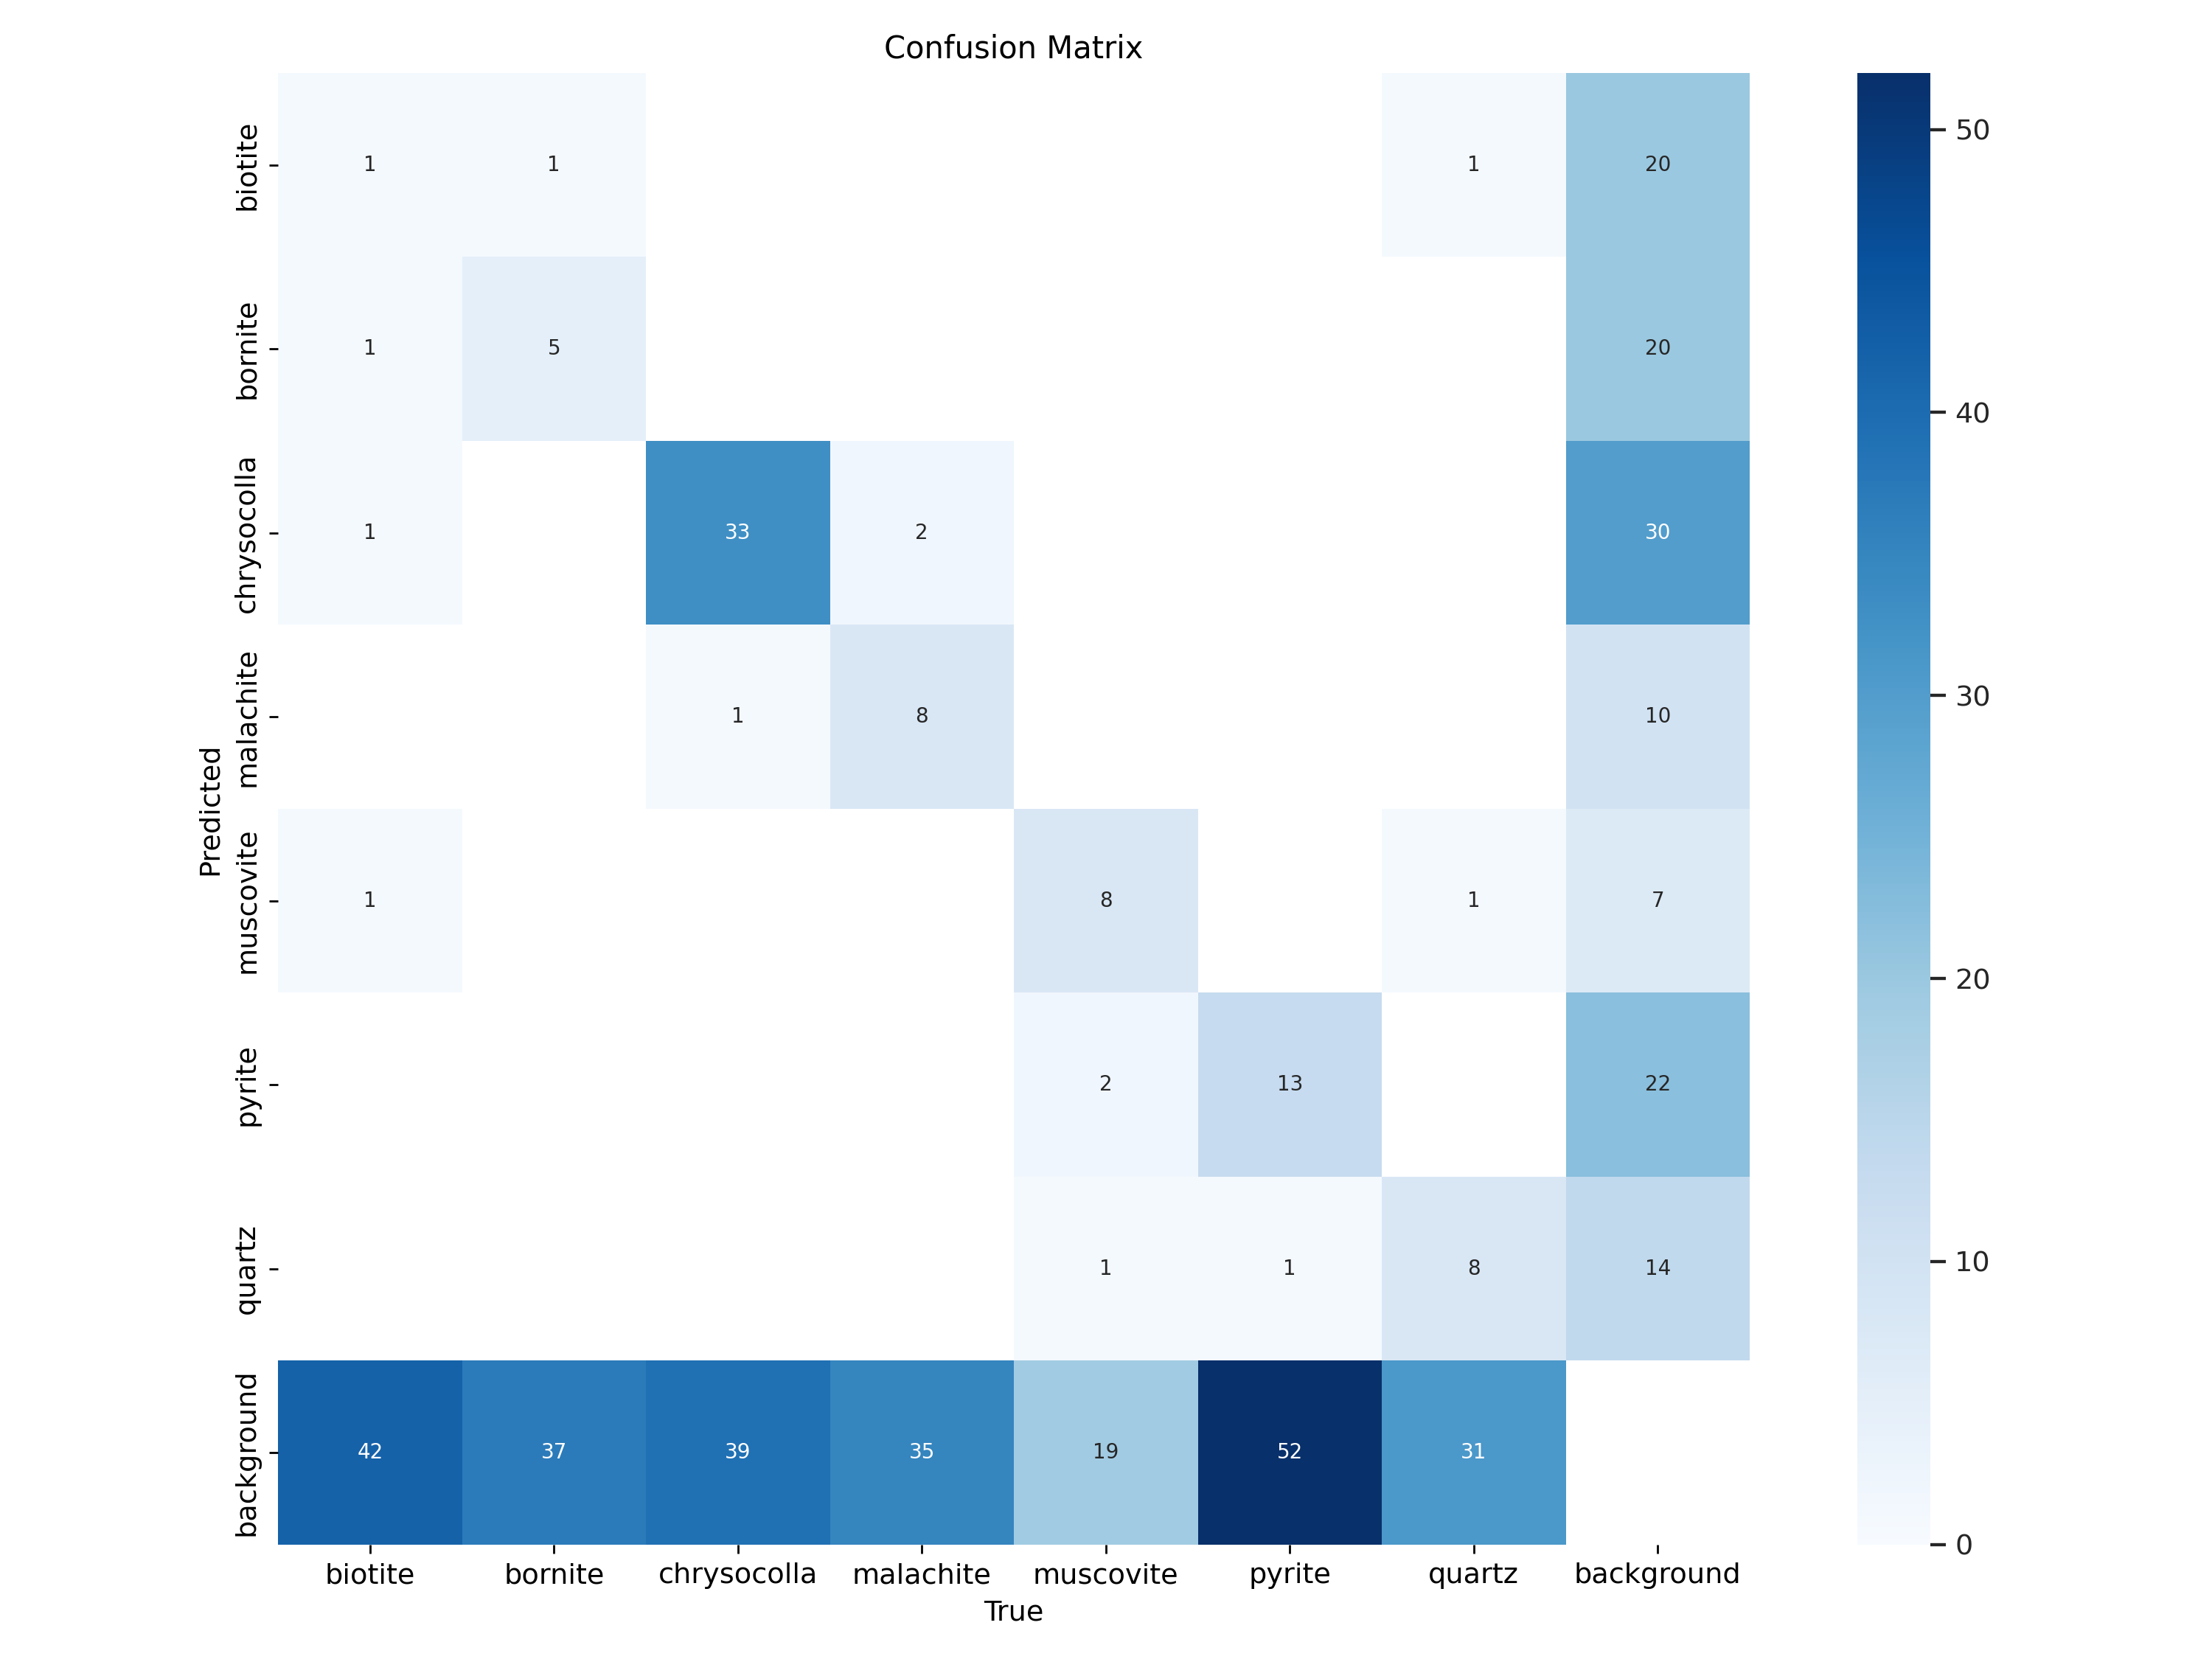

In [ ]:
#evalution matrix
resultData='/content/mineral_detector_dataset/Mineral_Ore_Detection-2/runs/detect/train'
from IPython.display import Image,display

# Correct the filename by concatenating the path and filename
Image(filename=os.path.join(resultData, 'confusion_matrix.png'))

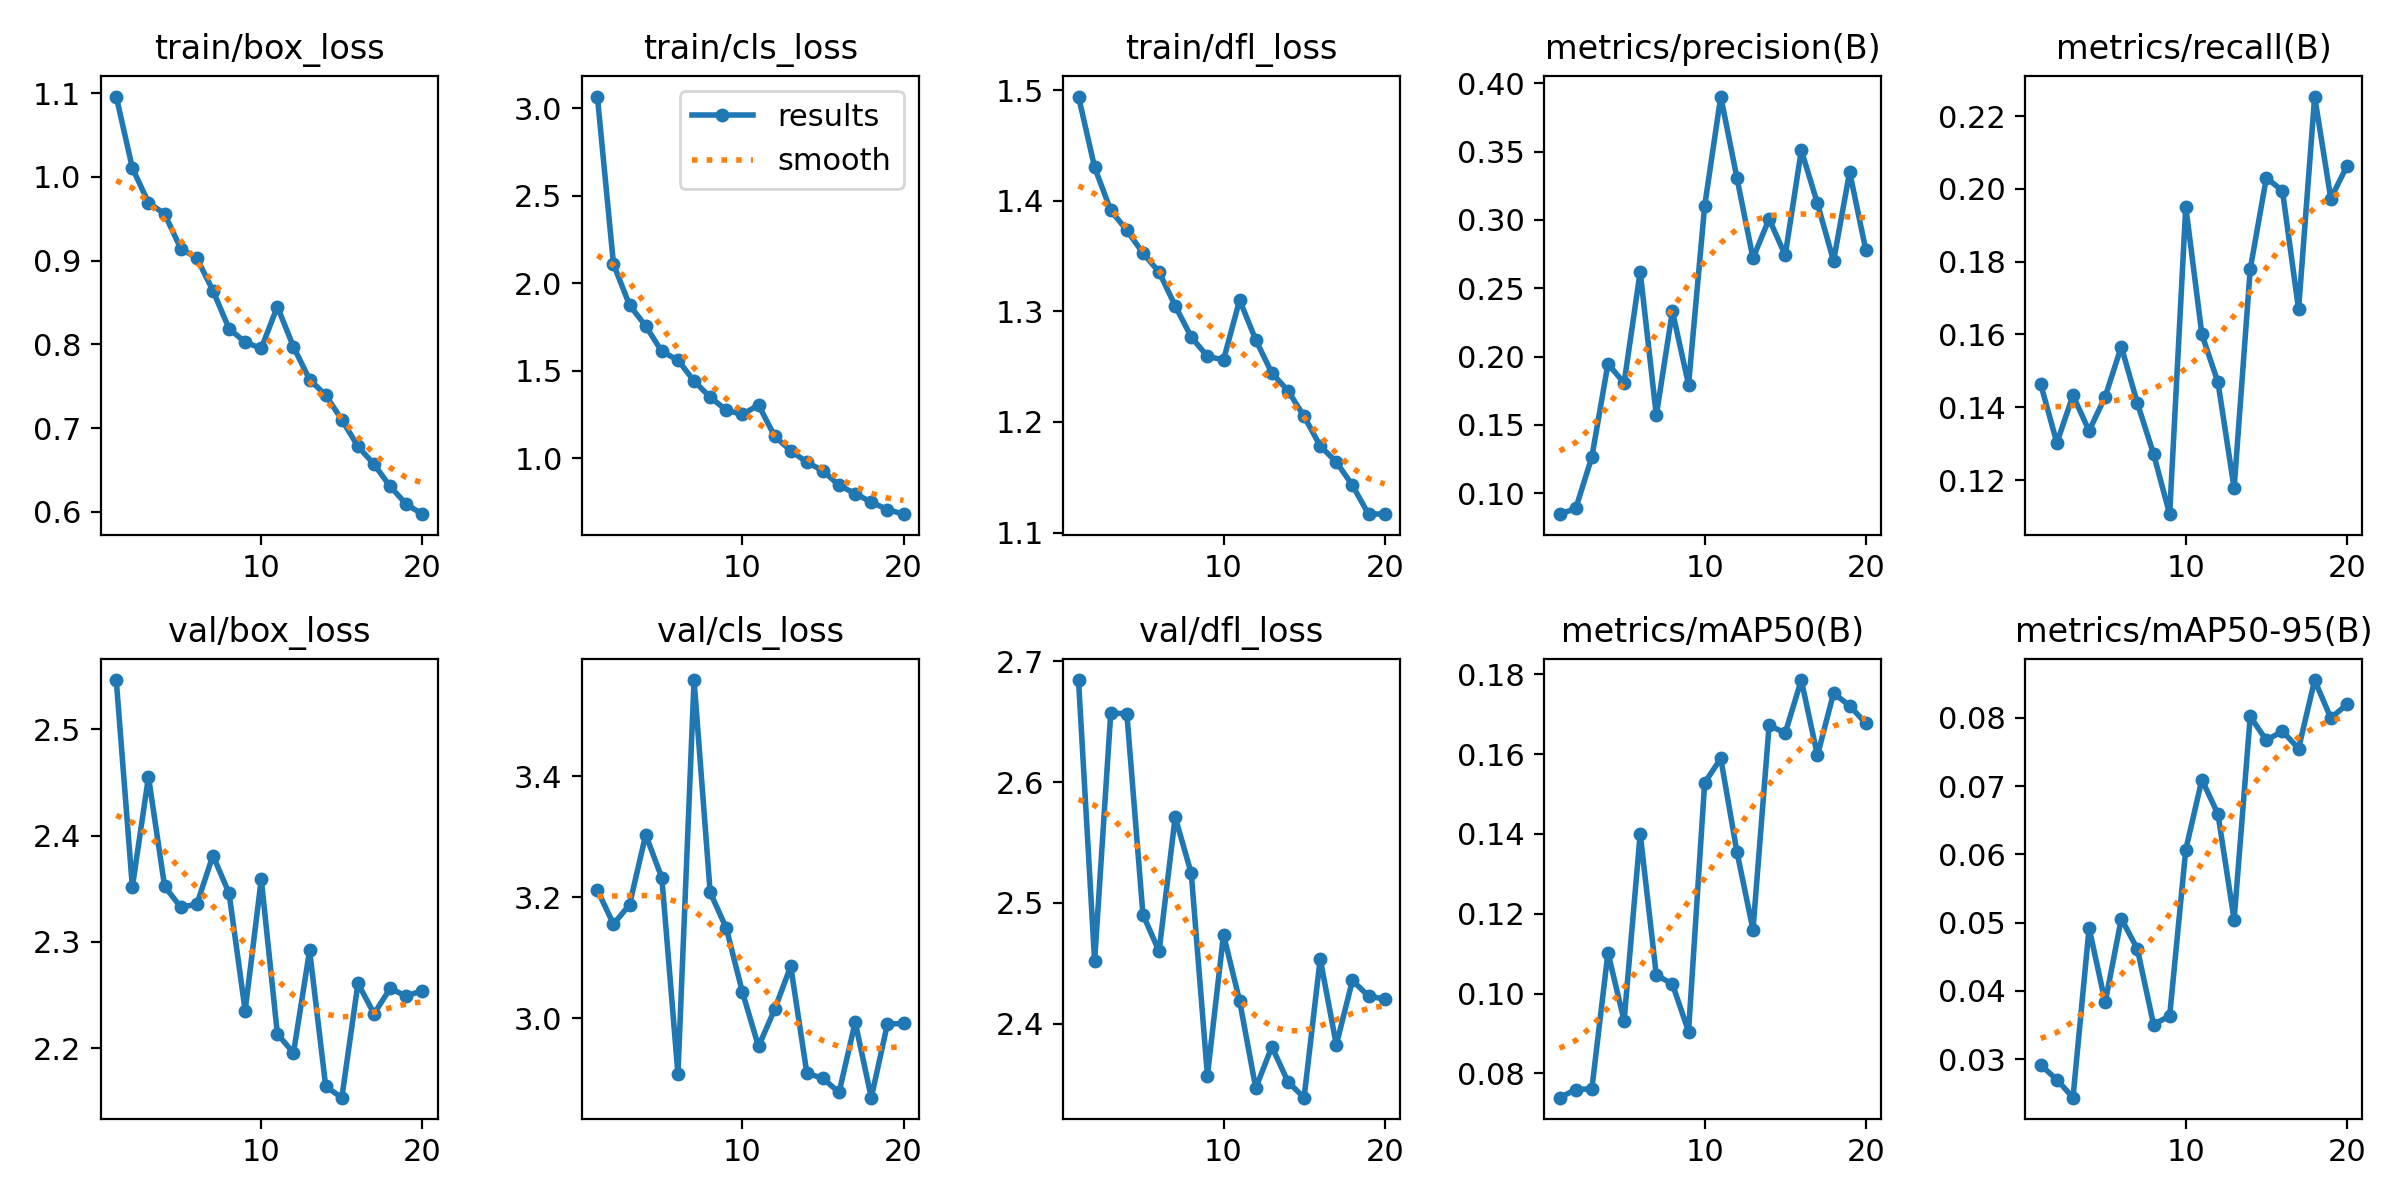

In [32]:
Image(filename=f'{resultData}/results.png')


In [36]:
import pandas as pd

# Use pd.read_csv instead of pd.read to read the CSV file
df = pd.read_csv(f'{resultData}/results.csv')
print(df.head(5))

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   54.8574         1.09612         3.06750         1.49411   
1      2  104.3080         1.01079         2.10922         1.43017   
2      3  153.4590         0.96923         1.87515         1.39124   
3      4  202.8520         0.95595         1.75638         1.37323   
4      5  252.2510         0.91449         1.61062         1.35262   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.08470            0.14632           0.07390   
1               0.08887            0.13022           0.07593   
2               0.12649            0.14327           0.07613   
3               0.19479            0.13352           0.11025   
4               0.18066            0.14293           0.09319   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.02914       2.54626       3.21192       2.68443  0.000300   
1              0.02702       2.35160  

In [37]:
print(df.tail(1))

    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
19     20  977.293         0.59703         0.68098         1.11693   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
19               0.27813            0.20624           0.16776   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
19              0.08195       2.25439       2.99126       2.42039  0.000054   

      lr/pg1    lr/pg2  
19  0.000054  0.000054  


In [38]:
%pwd

'/content/mineral_detector_dataset/Mineral_Ore_Detection-2'

In [39]:
os.chdir("/content")

In [40]:
%pwd

'/content'

In [41]:
!mkdir ManualTestingData

In [ ]:
#file of save dataset ofter testing with detection
os.chdir("/content/ManualTestingData")

In [ ]:
#testdata
URL="https://drive.google.com/file/d/id/view?usp=sharing"
id='your google drive file of testing imaage/video'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download/id' -o inputimage.jpg

In [59]:
weightsPath='/content/mineral_detector_dataset/Mineral_Ore_Detection-2/runs/detect/train/weights' # Include 'weights' subdirectory
!yolo task=detect mode=predict model=/content/mineral_detector_dataset/Mineral_Ore_Detection-2/runs/detect/train/weights/best.pt source='/content/se2.2-19-45-10x_detection.jpg'

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/se2.2-19-45-10x_detection.jpg: 480x640 (no detections), 37.2ms
Speed: 3.1ms preprocess, 37.2ms inference, 35.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict13
💡 Learn more at https://docs.ultralytics.com/modes/predict
